In [2]:
from emoatlas import EmoScores
import emoatlas
import matplotlib
import pandas as pd
import pandas as pd
import scikit_posthocs as sp
from scipy import stats

/Users/luisaporzio/cognitive ds/project/CDS_Hackaton/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/luisaporzio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
emos = EmoScores()

In [5]:
emos

In [249]:
df = pd.read_csv('../generated_data/cleaned/emotions.csv').drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [250]:
df.head()

,type of prompt,temperature,text,anger,trust,surprise,disgust,joy,sadness,fear,anticipation
0,positive,0.1,"Alright, self, let's have a little chat, eh?...",-1.611361,-0.866075,0.735294,-2.090817,4.507723,-0.245104,-1.682137,1.733201
1,positive,0.1,"Man, I can't believe it's been six months al...",-2.159970,0.213157,1.915796,-3.156802,3.945162,-0.735375,-1.178862,4.670889
2,positive,0.1,"Man, I can't believe it's been six months si...",-2.427176,2.601158,0.383422,-2.511128,3.774583,-1.312663,-2.654619,3.425799
3,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.152851,0.299704,0.918288,-2.726653,4.032832,-1.537257,-2.356121,3.214212
4,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.621279,3.521028,-0.073069,-2.688157,6.814532,-2.239862,-2.681890,4.120795


In [104]:
df['text'].iloc[0]

"  Alright, self, let's have a little chat, eh? It's been a while since we've had one of these heart-to-hearts. I mean, it's not like I don't talk to myself already, what with all the data analysis and coding I do at work. But this is different, this is just... me, you know?  So, here I am, in the big city, working as a data scientist for a massive company. It's a bloody good job, really. I get to use my brain, solve complex problems, and make a difference in the world, even if it's just a tiny one. And the people, they're alright, too. I've made some good mates here, the kind of people who'll go for a pint with you after work or help you move flats on the weekend.  But, blimey, it's not all sunshine and roses, is it? I mean, I've only been here for a few months, and I'm still trying to figure this place out. London's a bloody monster of a city, and it can be a bit overwhelming at times. I miss the countryside, the fresh air, the quiet. I miss my old mates, too, the ones I left behind 

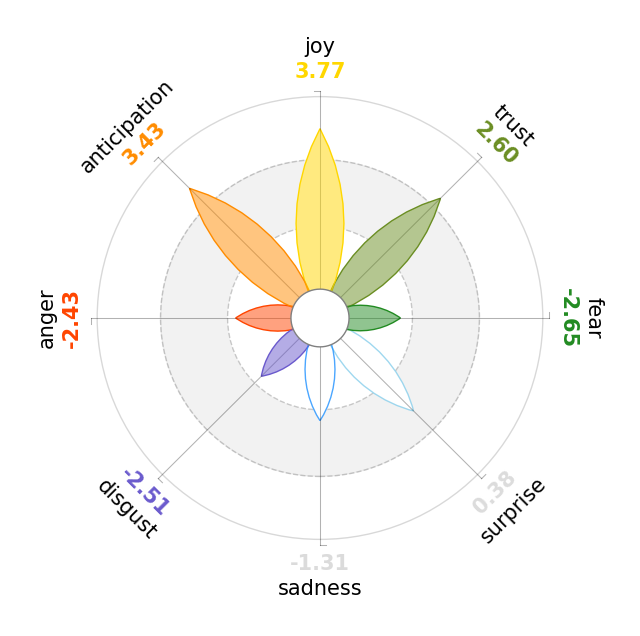

In [14]:
emos.draw_statistically_significant_emotions(df['text'].iloc[2])

In [237]:
dct = {'anger' : list(),
'trust' : list(),
'surprise' : list(), 
'disgust' : list(),
'joy' : list(),
'sadness' : list(),
'fear' : list(),
'anticipation' : list()}

In [238]:
for i in range(2):
    text = df['text'].iloc[i]
    scores = emos.zscores(text)
    for k in scores:
        dct[k].append(scores[k])

In [239]:
def compute_scores(df, n = -1):
    dct = {'anger' : list(),
'trust' : list(),
'surprise' : list(), 
'disgust' : list(),
'joy' : list(),
'sadness' : list(),
'fear' : list(),
'anticipation' : list()}

    if n == -1:
        for i in range(len(df)):
            text = df['text'].iloc[i]
            scores = emos.zscores(text)
            for k in scores:
                dct[k].append(scores[k])
    else:
        for i in range(len(df)):
            text = df['text'].iloc[i]
            scores = emos.zscores(text)
            for k in scores:
                dct[k].append(scores[k])

    return dct

TODO: convert dct into dataframe, then add to the cleaned df

In [240]:
#dct = compute_scores(df)

In [112]:
len(dct['anger'])

590

In [251]:
#df_emotions = pd.DataFrame(dct)

In [252]:
#df_emotions

,anger,trust,surprise,disgust,joy,sadness,fear,anticipation
0,-1.611361,-0.866075,0.735294,-2.090817,4.507723,-0.245104,-1.682137,1.733201
1,-2.159970,0.213157,1.915796,-3.156802,3.945162,-0.735375,-1.178862,4.670889
2,-2.427176,2.601158,0.383422,-2.511128,3.774583,-1.312663,-2.654619,3.425799
3,-2.152851,0.299704,0.918288,-2.726653,4.032832,-1.537257,-2.356121,3.214212
4,-2.621279,3.521028,-0.073069,-2.688157,6.814532,-2.239862,-2.681890,4.120795
...,...,...,...,...,...,...,...,...
585,-2.572964,1.218262,1.455391,-3.043076,2.490932,-0.442696,-0.132922,2.094946
586,-1.777160,1.798189,1.257082,-1.954209,3.621043,-1.064362,-2.243852,2.970723
587,-2.104422,1.577568,0.565390,-2.330096,1.648249,-0.956464,-0.648436,3.476446
588,-2.725759,1.635352,-0.499467,-1.739936,2.946732,0.000000,-2.032019,1.479689


In [114]:
#pd.concat([df, df_emotions], axis = 1).to_csv('../generated_data/cleaned/emotions.csv')

In [253]:
df.groupby("temperature").agg("count")["text"]

temperature
0.1    254
0.7    232
1.3    104
Name: text, dtype: int64

In [116]:
df.groupby("type of prompt").agg("count")["text"]

type of prompt
negative    297
positive    293
Name: text, dtype: int64

# Exploratory Analyisis

In [117]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/luisaporzio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [255]:
nltk.download('punkt')

def word_count(df):
    return len(nltk.word_tokenize(df))

def sentence_count(df):
    return len(nltk.sent_tokenize(df))

df['word_count'] = df['text'].apply(word_count)
df['sentence_count'] = df['text'].apply(sentence_count)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/luisaporzio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [256]:
df['word_count']

0      610
1      473
2      566
3      970
4      713
      ... 
585    468
586    591
587    495
588    502
589    673
Name: word_count, Length: 590, dtype: int64

In [257]:
df['sentence_count']

0      39
1      22
2      40
3      57
4      35
       ..
585    29
586    38
587    28
588    43
589    31
Name: sentence_count, Length: 590, dtype: int64

In [258]:
#Sentiment Scores
from textblob import TextBlob

def get_sentiment(df):
    blob = TextBlob(df)
    return blob.sentiment.polarity  # value between -1 and +1

df['sentiment_score'] = df['text'].apply(get_sentiment)

In [259]:
df['sentiment_score']

0      0.058128
1      0.208446
2      0.166080
3      0.139366
4      0.167306
         ...   
585    0.081720
586    0.172969
587    0.064569
588    0.151880
589    0.050748
Name: sentiment_score, Length: 590, dtype: float64

In [260]:
# Lexical Diversity --> how many different words are there compared to the total of words
def lexical_diversity(text: str) -> float:
    tokens = nltk.word_tokenize(text.lower())
    return len(set(tokens)) / len(tokens) if tokens else 0

df['lexical_diversity'] = df['text'].apply(lexical_diversity)

In [124]:
df['lexical_diversity']

0      0.354680
1      0.456660
2      0.342756
3      0.284536
4      0.391304
         ...   
585    0.461538
586    0.395939
587    0.482828
588    0.390438
589    0.424963
Name: lexical_diversity, Length: 590, dtype: float64

In [125]:
# Syntactic Diversity (Averege sentence lenght)
def avg_sentence_length(text):
    sentences = nltk.sent_tokenize(text)
    words = nltk.word_tokenize(text)
    return len(words) / len(sentences) if sentences else 0

df['avg_sentence_length'] = df['text'].apply(avg_sentence_length)

In [126]:
df['avg_sentence_length']

0      15.641026
1      21.500000
2      14.150000
3      17.017544
4      20.371429
         ...    
585    16.137931
586    15.552632
587    17.678571
588    11.674419
589    21.709677
Name: avg_sentence_length, Length: 590, dtype: float64

In [127]:
# Mean Word Frequencies
my_dict = dict()
def words_freq(text: str):
    for word in text.split(" "):
        if word in my_dict:
            my_dict[word] += 1
        else:
            my_dict[word] = 1

In [128]:
df["text"].apply(words_freq)

0      None
1      None
2      None
3      None
4      None
       ... 
585    None
586    None
587    None
588    None
589    None
Name: text, Length: 590, dtype: object

In [129]:
sorted(my_dict.items(),key=lambda x: x[1], reverse=True)

[('I', 12369),
 ('the', 10392),
 ('to', 9075),
 ('a', 7162),
 ('', 6466),
 ('and', 5594),
 ('of', 5262),
 ('in', 4304),
 ('my', 3891),
 ("I'm", 3654),
 ('this', 3428),
 ('that', 2930),
 ('just', 2557),
 ('But', 2139),
 ('like', 1904),
 ('for', 1904),
 ("I've", 1851),
 ('but', 1835),
 ('it', 1800),
 ('And', 1784),
 ("it's", 1547),
 ('at', 1427),
 ('all', 1378),
 ('find', 1249),
 ('not', 1236),
 ('make', 1219),
 ('what', 1181),
 ('data', 1168),
 ('feel', 1159),
 ("can't", 1145),
 ('is', 1123),
 ('with', 1106),
 ("It's", 1085),
 ('so', 1083),
 ('city', 1068),
 ('be', 1024),
 ('keep', 1022),
 ('The', 970),
 ('on', 967),
 ('me', 961),
 ('you', 959),
 ("I'll", 955),
 ('if', 951),
 ('one', 907),
 ('out', 837),
 ('who', 836),
 ('can', 826),
 ('as', 777),
 ('have', 776),
 ('got', 758),
 ('new', 752),
 ('about', 749),
 ('been', 728),
 ('help', 707),
 ('more', 703),
 ('here', 700),
 ('myself', 697),
 ('trying', 681),
 ('or', 680),
 ('mean,', 666),
 ('do', 655),
 ('want', 640),
 ("don't", 637),
 (

In [130]:
import nltk
from nltk.corpus import stopwords
import string


# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
    # Tokenize
    tokens = nltk.word_tokenize(text.lower())
    # Remove stopwords and punctuation
    cleaned_tokens = [token for token in tokens if token not in stop_words  and token not in punctuation and token not in ["'s","'m", "n't","'ve","'ll", "ca"]]
    return ' '.join(cleaned_tokens)

In [131]:
# Now we create another cleaned dataset without the stopwords so that we can apply again the function above and see again 
# which one is the most frequent word.
df['text_cleaned'] = df['text'].apply(clean_text)

In [132]:
df['text_cleaned']

0      alright self let little chat eh since one hear...
1      man believe six months already since moved bus...
2      man believe six months since moved london craz...
3      alright self let little chat shall mean else g...
4      alright self let little chat shall mean else g...
                             ...                        
585    alright mate listen standing bustling london s...
586    alright mate listen bustling metropolis london...
587    alright mate let get straight standing heart l...
588    alright mate let get heads straight london eh ...
589    alright mate go another day concrete jungle ca...
Name: text_cleaned, Length: 590, dtype: object

In [133]:
#Mean words frequencies without stopwords
my_dict2 = dict()
def words_freq2(text: str):
    for word in text.split(" "):
        if word in my_dict2:
            my_dict2[word] += 1
        else:
            my_dict2[word] = 1


In [134]:
df["text_cleaned"].apply(words_freq2)

0      None
1      None
2      None
3      None
4      None
       ... 
585    None
586    None
587    None
588    None
589    None
Name: text_cleaned, Length: 590, dtype: object

In [135]:
sorted(my_dict2.items(),key=lambda x: x[1], reverse=True)

[('city', 2165),
 ('like', 2057),
 ('data', 1525),
 ('london', 1318),
 ('find', 1262),
 ('make', 1239),
 ('maybe', 1227),
 ('feel', 1206),
 ('know', 1192),
 ('keep', 1057),
 ('one', 1013),
 ('life', 922),
 ('people', 919),
 ('...', 849),
 ('world', 816),
 ('something', 806),
 ('got', 798),
 ('day', 794),
 ('new', 772),
 ('job', 768),
 ('trying', 758),
 ('help', 715),
 ('work', 710),
 ('time', 709),
 ("'re", 707),
 ('mean', 699),
 ('want', 699),
 ('scientist', 677),
 ('lost', 660),
 ('see', 642),
 ('place', 639),
 ('let', 633),
 ('really', 626),
 ('way', 596),
 ('even', 583),
 ('numbers', 577),
 ('always', 565),
 ('never', 554),
 ('back', 525),
 ('sometimes', 523),
 ('right', 513),
 ('going', 510),
 ('dreams', 493),
 ('another', 487),
 ('get', 484),
 ('still', 444),
 ('every', 442),
 ('need', 426),
 ('alright', 407),
 ('man', 393),
 ('big', 391),
 ('friends', 391),
 ('thought', 391),
 ('look', 388),
 ('yet', 387),
 ('sense', 382),
 ('feels', 362),
 ('wonder', 355),
 ('mate', 351),
 ('ar

# Statistical analysis

It is not possible to conduct a two-way anova test for the 6 groups as the main assumptions of normality are not respected. Therefore, a possible alternative can be Kruscal Wallist test. However, similar to anova the Kruscal wallist test has as null hypothesis that all groups have the same mean. In the case in which the null hypothesis is rejected then it would only mean that at least one group differs from the others. To learn specifics about each group it is necessary to conduct a post-hoc test like Dunn's test.

In [136]:
# Kruscal wallist test only to see if the change in temperature affects words count
from scipy import stats

# Suppose you have 3 groups (already split by tone/temperature)
group1 = df[df['temperature'] == 0.1]['word_count']
group2 = df[df['temperature'] == 0.7]['word_count']
group3 = df[df['temperature'] == 1.3]['word_count']

# Run Kruskal-Wallis test
h_stat, p_val = stats.kruskal(group1, group2, group3)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 20.179, p-value: 0.0000415086


In [137]:
# Dunn's test only between temperature and word count

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df, val_col='word_count', group_col='temperature', p_adjust='holm')
    print(dunn)

          0.1       0.7       1.3
0.1  1.000000  0.151551  0.001267
0.7  0.151551  1.000000  0.000023
1.3  0.001267  0.000023  1.000000


In [138]:
# Kruscal wallist test for all 6 groups to see if word count changes on the base of both tone (positive/negative) and temperature
# Create a combined group label
df['group'] = df['type of prompt'] + "_" + df['temperature'].astype(str)

# Split into list of arrays
groups = [df[df['group'] == g]['word_count'] for g in df['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 28.883, p-value: 0.0000244460


In [139]:
#Dunn's test

# Create group label
df['group'] = df['type of prompt'] + "_" + df['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df, val_col='word_count', group_col='group', p_adjust='holm')
    print(dunn)


              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1      1.000000      0.701029      0.035730      0.484038   
negative_0.7      0.701029      1.000000      0.001083      0.025695   
negative_1.3      0.035730      0.001083      1.000000      0.535087   
positive_0.1      0.484038      0.025695      0.535087      1.000000   
positive_0.7      0.860573      0.179777      0.304264      1.000000   
positive_1.3      0.016641      0.000356      1.000000      0.412309   

              positive_0.7  positive_1.3  
negative_0.1      0.860573      0.016641  
negative_0.7      0.179777      0.000356  
negative_1.3      0.304264      1.000000  
positive_0.1      1.000000      0.412309  
positive_0.7      1.000000      0.179777  
positive_1.3      0.179777      1.000000  


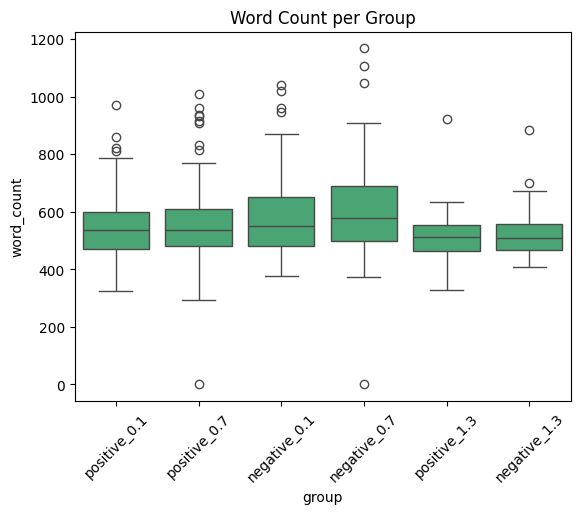

In [140]:
# Visualize key differences
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='group', y='word_count', data=df, color="mediumseagreen")
plt.title('Word Count per Group')
plt.xticks(rotation=45)
plt.show()

## Statistical analysis sentiment_scores
Now it is possible to apply the same kruskal willis test using sentiment_scores as dependent variable instead of words_count. Following that it will be possible to compare the sentiment scores with the emoatlas scores, in order to see if they align. 

In [141]:
#Dunn's test type of prompt and sentiment score because they only are 2 groups.

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df, val_col='sentiment_score', group_col='type of prompt', p_adjust='holm')
    print(dunn)


              negative      positive
negative  1.000000e+00  3.286371e-11
positive  3.286371e-11  1.000000e+00


In [142]:
# Kruscal wallist test for all 6 groups to see if sentiment_score change on the base of both tone (positive/negative) and temperature

# Create a combined group label
df['group'] = df['type of prompt'] + "_" + df['temperature'].astype(str)

# Split into list of arrays
groups = [df[df['group'] == g]['sentiment_score'] for g in df['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 46.531, p-value: 0.0000000071


In [143]:
# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df, val_col='sentiment_score', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1      1.000000      1.000000      1.000000      0.000008   
negative_0.7      1.000000      1.000000      1.000000      0.002815   
negative_1.3      1.000000      1.000000      1.000000      0.011946   
positive_0.1      0.000008      0.002815      0.011946      1.000000   
positive_0.7      0.000002      0.000997      0.005504      1.000000   
positive_1.3      0.018578      0.279260      0.279260      1.000000   

              positive_0.7  positive_1.3  
negative_0.1      0.000002      0.018578  
negative_0.7      0.000997      0.279260  
negative_1.3      0.005504      0.279260  
positive_0.1      1.000000      1.000000  
positive_0.7      1.000000      1.000000  
positive_1.3      1.000000      1.000000  


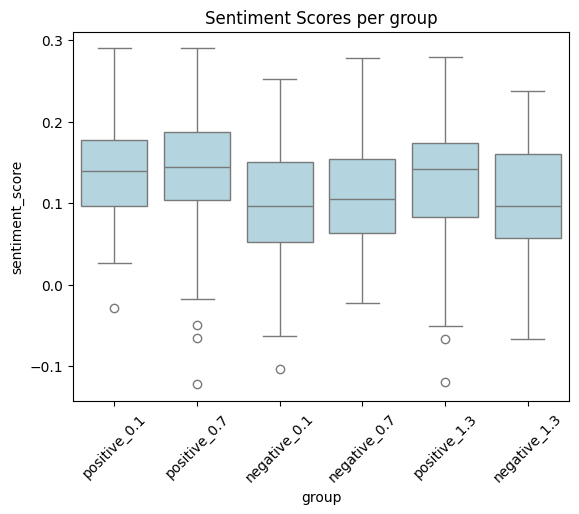

In [144]:
# Visualize key differences
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='group', y='sentiment_score', data=df, color="lightblue")
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.title('Sentiment Scores per group')
plt.xticks(rotation=45)
plt.show()

# Emotions statistical analysis
The last step of this analysis will be investigating the statistical significance of the emoatlas scores based on the changes in temperature and type of prompt (positive/negative). This will be done for each emotion (anger, trust, surprise, disgust, joy, sadness, fear, anticipation). Finally, the emoatlast scores will be compared with the sentiment scores.

In [147]:
df_emotions = pd.read_csv("../generated_data/cleaned/emotions.csv")

In [150]:
df_emotions.head()

,Unnamed: 0.1,Unnamed: 0,type of prompt,temperature,text,anger,trust,surprise,disgust,joy,sadness,fear,anticipation
0,0,0,positive,0.1,"Alright, self, let's have a little chat, eh?...",-1.611361,-0.866075,0.735294,-2.090817,4.507723,-0.245104,-1.682137,1.733201
1,1,1,positive,0.1,"Man, I can't believe it's been six months al...",-2.159970,0.213157,1.915796,-3.156802,3.945162,-0.735375,-1.178862,4.670889
2,2,3,positive,0.1,"Man, I can't believe it's been six months si...",-2.427176,2.601158,0.383422,-2.511128,3.774583,-1.312663,-2.654619,3.425799
3,3,4,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.152851,0.299704,0.918288,-2.726653,4.032832,-1.537257,-2.356121,3.214212
4,4,5,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.621279,3.521028,-0.073069,-2.688157,6.814532,-2.239862,-2.681890,4.120795


In [151]:
# Kruscal wallist test for anger group to see if emotion score change on the base of tone (positive/negative) 
# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['anger'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 28.856, p-value: 0.0000000780


In [152]:
# Kruscal wallist test for trust group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['trust'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 0.059, p-value: 0.8076514852


In [153]:
# Kruscal wallist test for surprise group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['surprise'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 3.064, p-value: 0.0800607325


In [154]:
# Kruscal wallist test for disgust group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['disgust'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 18.435, p-value: 0.0000175768


In [155]:
# Kruscal wallist test for joy group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['joy'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.50f}")

Kruskal-Wallis H statistic: 210.294, p-value: 0.00000000000000000000000000000000000000000000001185


In [156]:
# Kruscal wallist test for sadness group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['sadness'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.70f}")

Kruskal-Wallis H statistic: 285.468, p-value: 0.0000000000000000000000000000000000000000000000000000000000000004831537


In [157]:
# Kruscal wallist test for fear group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['fear'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.50f}")

Kruskal-Wallis H statistic: 142.932, p-value: 0.00000000000000000000000000000000608225300451339401


In [158]:
# Kruscal wallist test for anticipation group to see if emotion score change on the base of tone (positive/negative)

# Split into list of arrays
groups = [df_emotions[df_emotions['type of prompt'] == g]['anticipation'] for g in df_emotions['type of prompt'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.50f}")

Kruskal-Wallis H statistic: 116.473, p-value: 0.00000000000000000000000000374518241119722135409810


These are the interactions effects

In [159]:
# Kruscal wallist test for anger group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['anger'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 39.007, p-value: 0.0000002367


In [160]:
# Kruscal wallist test for trust group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['trust'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 2.087, p-value: 0.8369311417


In [161]:
# Kruscal wallist test for surprise group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['surprise'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 14.553, p-value: 0.0124528091


In [162]:
# Kruscal wallist test for disgust group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['disgust'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.10f}")

Kruskal-Wallis H statistic: 19.635, p-value: 0.0014632249


In [163]:
# Kruscal wallist test for joy group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['joy'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.50f}")

Kruskal-Wallis H statistic: 217.243, p-value: 0.00000000000000000000000000000000000000000000578877


In [164]:
# Kruscal wallist test for sadness group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['sadness'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.90f}")

Kruskal-Wallis H statistic: 288.241, p-value: 0.000000000000000000000000000000000000000000000000000000000003375397992594272501268790639801


In [165]:
# Kruscal wallist test for fear group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['fear'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.50f}")

Kruskal-Wallis H statistic: 147.123, p-value: 0.00000000000000000000000000000546731420282026738472


In [166]:
# Kruscal wallist test for anticipation group to see if sentiment_scores change on the base of both tone (positive/negative) an
# temperature

# Create a combined group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# Split into list of arrays
groups = [df_emotions[df_emotions['group'] == g]['anticipation'] for g in df_emotions['group'].unique()]

# Run Kruskal-Wallis
h_stat, p_val = stats.kruskal(*groups)

print(f"Kruskal-Wallis H statistic: {h_stat:.3f}, p-value: {p_val:.30f}")

Kruskal-Wallis H statistic: 120.435, p-value: 0.000000000000000000000002538170


Now we do the Dunn's test for all the emotions (anger, trust, surprise, disgust, joy, sadness, fear, anticipation)

In [167]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='anger', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1      1.000000      1.000000      0.031653      0.000521   
negative_0.7      1.000000      1.000000      0.189586      0.017946   
negative_1.3      0.031653      0.189586      1.000000      1.000000   
positive_0.1      0.000521      0.017946      1.000000      1.000000   
positive_0.7      0.000005      0.000433      1.000000      1.000000   
positive_1.3      0.018027      0.125907      1.000000      1.000000   

              positive_0.7  positive_1.3  
negative_0.1      0.000005      0.018027  
negative_0.7      0.000433      0.125907  
negative_1.3      1.000000      1.000000  
positive_0.1      1.000000      1.000000  
positive_0.7      1.000000      1.000000  
positive_1.3      1.000000      1.000000  


In [168]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='trust', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1           1.0           1.0           1.0           1.0   
negative_0.7           1.0           1.0           1.0           1.0   
negative_1.3           1.0           1.0           1.0           1.0   
positive_0.1           1.0           1.0           1.0           1.0   
positive_0.7           1.0           1.0           1.0           1.0   
positive_1.3           1.0           1.0           1.0           1.0   

              positive_0.7  positive_1.3  
negative_0.1           1.0           1.0  
negative_0.7           1.0           1.0  
negative_1.3           1.0           1.0  
positive_0.1           1.0           1.0  
positive_0.7           1.0           1.0  
positive_1.3           1.0           1.0  


In [169]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='surprise', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1      1.000000      1.000000      1.000000      1.000000   
negative_0.7      1.000000      1.000000      1.000000      0.539267   
negative_1.3      1.000000      1.000000      1.000000      1.000000   
positive_0.1      1.000000      0.539267      1.000000      1.000000   
positive_0.7      1.000000      0.083753      0.319286      1.000000   
positive_1.3      0.539267      1.000000      1.000000      0.295900   

              positive_0.7  positive_1.3  
negative_0.1      1.000000      0.539267  
negative_0.7      0.083753      1.000000  
negative_1.3      0.319286      1.000000  
positive_0.1      1.000000      0.295900  
positive_0.7      1.000000      0.057097  
positive_1.3      0.057097      1.000000  


In [170]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='disgust', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1      1.000000      1.000000      1.000000      0.028602   
negative_0.7      1.000000      1.000000      1.000000      0.030977   
negative_1.3      1.000000      1.000000      1.000000      0.555933   
positive_0.1      0.028602      0.030977      0.555933      1.000000   
positive_0.7      0.029008      0.030977      0.555933      1.000000   
positive_1.3      1.000000      1.000000      1.000000      1.000000   

              positive_0.7  positive_1.3  
negative_0.1      0.029008           1.0  
negative_0.7      0.030977           1.0  
negative_1.3      0.555933           1.0  
positive_0.1      1.000000           1.0  
positive_0.7      1.000000           1.0  
positive_1.3      1.000000           1.0  


In [171]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='joy', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1  1.000000e+00  7.824615e-01  2.300884e-01  1.715459e-21   
negative_0.7  7.824615e-01  1.000000e+00  8.815631e-01  2.803880e-15   
negative_1.3  2.300884e-01  8.815631e-01  1.000000e+00  4.869616e-07   
positive_0.1  1.715459e-21  2.803880e-15  4.869616e-07  1.000000e+00   
positive_0.7  9.609688e-26  5.896704e-19  3.812602e-09  8.815631e-01   
positive_1.3  4.391854e-17  6.108769e-13  2.214754e-07  8.815631e-01   

              positive_0.7  positive_1.3  
negative_0.1  9.609688e-26  4.391854e-17  
negative_0.7  5.896704e-19  6.108769e-13  
negative_1.3  3.812602e-09  2.214754e-07  
positive_0.1  8.815631e-01  8.815631e-01  
positive_0.7  1.000000e+00  8.815631e-01  
positive_1.3  8.815631e-01  1.000000e+00  


In [172]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='sadness', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1  1.000000e+00  1.000000e+00  1.000000e+00  2.839646e-31   
negative_0.7  1.000000e+00  1.000000e+00  1.000000e+00  1.239157e-29   
negative_1.3  1.000000e+00  1.000000e+00  1.000000e+00  1.655551e-13   
positive_0.1  2.839646e-31  1.239157e-29  1.655551e-13  1.000000e+00   
positive_0.7  1.084195e-25  2.251628e-24  3.963070e-11  1.000000e+00   
positive_1.3  4.970894e-17  2.089614e-16  6.712742e-09  1.000000e+00   

              positive_0.7  positive_1.3  
negative_0.1  1.084195e-25  4.970894e-17  
negative_0.7  2.251628e-24  2.089614e-16  
negative_1.3  3.963070e-11  6.712742e-09  
positive_0.1  1.000000e+00  1.000000e+00  
positive_0.7  1.000000e+00  1.000000e+00  
positive_1.3  1.000000e+00  1.000000e+00  


In [173]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='fear', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1  1.000000e+00  1.000000e+00  1.000000e+00  9.256250e-15   
negative_0.7  1.000000e+00  1.000000e+00  1.000000e+00  1.048711e-17   
negative_1.3  1.000000e+00  1.000000e+00  1.000000e+00  8.712564e-09   
positive_0.1  9.256250e-15  1.048711e-17  8.712564e-09  1.000000e+00   
positive_0.7  2.433026e-12  5.142931e-15  1.504793e-07  1.000000e+00   
positive_1.3  9.074618e-05  3.459902e-06  1.618632e-03  4.702202e-01   

              positive_0.7  positive_1.3  
negative_0.1  2.433026e-12      0.000091  
negative_0.7  5.142931e-15      0.000003  
negative_1.3  1.504793e-07      0.001619  
positive_0.1  1.000000e+00      0.470220  
positive_0.7  1.000000e+00      0.892120  
positive_1.3  8.921201e-01      1.000000  


In [174]:
#Dunn's test

# Create group label
df_emotions['group'] = df_emotions['type of prompt'] + "_" + df_emotions['temperature'].astype(str)

# If p < 0.05 => Dunn's post-hoc
if p_val < 0.05:
    dunn = sp.posthoc_dunn(df_emotions, val_col='anticipation', group_col='group', p_adjust='holm')
    print(dunn)

              negative_0.1  negative_0.7  negative_1.3  positive_0.1  \
negative_0.1  1.000000e+00  1.000000e+00  1.000000e+00  2.156016e-09   
negative_0.7  1.000000e+00  1.000000e+00  1.000000e+00  1.037211e-10   
negative_1.3  1.000000e+00  1.000000e+00  1.000000e+00  1.575002e-04   
positive_0.1  2.156016e-09  1.037211e-10  1.575002e-04  1.000000e+00   
positive_0.7  1.268952e-13  4.268835e-15  7.613605e-07  7.292165e-01   
positive_1.3  1.425005e-05  2.067387e-06  2.886396e-03  1.000000e+00   

              positive_0.7  positive_1.3  
negative_0.1  1.268952e-13      0.000014  
negative_0.7  4.268835e-15      0.000002  
negative_1.3  7.613605e-07      0.002886  
positive_0.1  7.292165e-01      1.000000  
positive_0.7  1.000000e+00      1.000000  
positive_1.3  1.000000e+00      1.000000  


Study 2 second part --> clustering of emotions to compare then with the sentiment scores

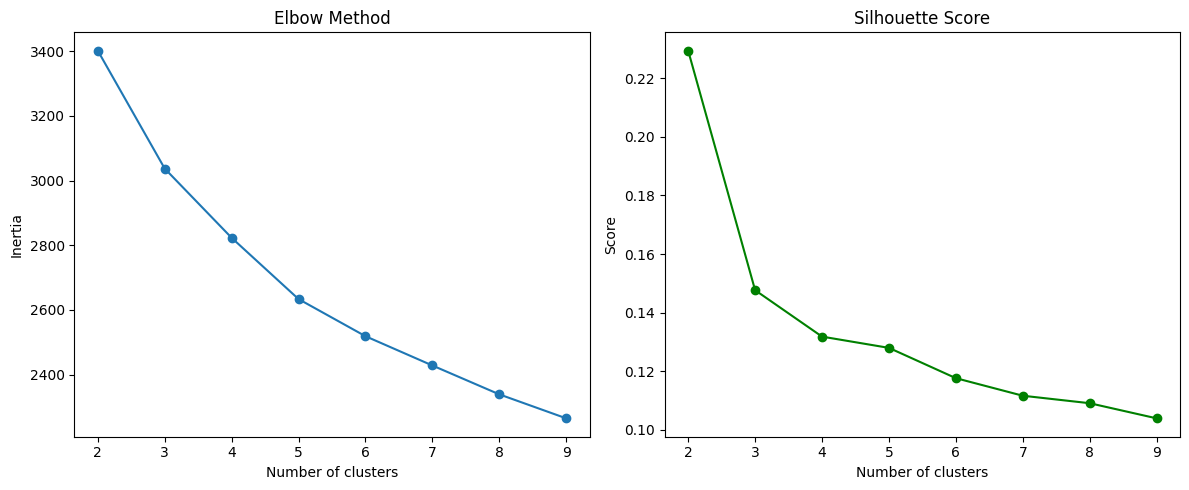

In [219]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Select emotion columns
emotion_cols = ['anger', 'trust', 'surprise', 'disgust', 'joy', 'sadness', 'fear', 'anticipation']
df_new_emotions = df_emotions[emotion_cols]

# Standardize the features
scaler = StandardScaler()
df_emotions_scaled = scaler.fit_transform(df_new_emotions)

# Elbow method to find optimal number of clusters
inertia = []
silhouette = []
K = range(2, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_emotions_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_emotions_scaled, kmeans.labels_))

# Plot elbow + silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Final KMeans clustering (choose e.g., k=4)
final_k = 4
kmeans = KMeans(n_clusters=final_k, random_state=42)
df_emotions['emotion_frame'] = kmeans.fit_predict(df_emotions_scaled)

In [220]:
df_emotions["emotion_frame"]

0      2
1      3
2      3
3      3
4      3
      ..
585    2
586    2
587    2
588    2
589    3
Name: emotion_frame, Length: 590, dtype: int32

,Unnamed: 0.1,Unnamed: 0,type of prompt,temperature,text,anger,trust,surprise,disgust,joy,sadness,fear,anticipation,group,emotion_frame
0,0,0,positive,0.1,"Alright, self, let's have a little chat, eh?...",-1.611361,-0.866075,0.735294,-2.090817,4.507723,-0.245104,-1.682137,1.733201,positive_0.1,2
1,1,1,positive,0.1,"Man, I can't believe it's been six months al...",-2.159970,0.213157,1.915796,-3.156802,3.945162,-0.735375,-1.178862,4.670889,positive_0.1,3
2,2,3,positive,0.1,"Man, I can't believe it's been six months si...",-2.427176,2.601158,0.383422,-2.511128,3.774583,-1.312663,-2.654619,3.425799,positive_0.1,3
3,3,4,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.152851,0.299704,0.918288,-2.726653,4.032832,-1.537257,-2.356121,3.214212,positive_0.1,3
4,4,5,positive,0.1,"Alright, self, let's have a little chat, sha...",-2.621279,3.521028,-0.073069,-2.688157,6.814532,-2.239862,-2.681890,4.120795,positive_0.1,3


In [233]:
df_merged = pd.concat([df, df_emotions], axis = 1)

In [234]:
df_merged.c

Index(['Unnamed: 0', 'type of prompt', 'temperature', 'text', 'word_count',
       'sentence_count', 'sentiment_score', 'lexical_diversity',
       'avg_sentence_length', 'text_cleaned', 'group', 'Unnamed: 0.1',
       'Unnamed: 0', 'type of prompt', 'temperature', 'text', 'anger', 'trust',
       'surprise', 'disgust', 'joy', 'sadness', 'fear', 'anticipation',
       'group', 'emotion_frame'],
      dtype='object')

In [231]:
df_merged.groupby('type of prompt')#['sentiment_score'].agg('mean')

ValueError: Grouper for 'type of prompt' not 1-dimensional

In [224]:
df_merged.groupby('emotion_frame')["sentiment_score"].mean()

emotion_frame
0    0.072247
1    0.121121
2    0.117866
3    0.155328
Name: sentiment_score, dtype: float64

In [215]:
def classify_emotion_frame(row):
    if row['sadness'] > 0.6 and row['trust'] > 0.3 and row['joy'] > 0.5:
        return 'Negative - Positive'
    elif row['anger'] > 0.6 and row['disgust'] > 0.6:
        return 'Negative - Negative'
    elif row['joy'] > 0.5 and row['anticipation'] > 0.5:
        return 'Positive - Positive'
    elif row['fear'] > 0.9 and row['sadness'] > 0.9:
        return 'Despair'
    else:
        return 'Mixed/Neutral'

df_merged['emotion_frame'] = df_merged.apply(classify_emotion_frame, axis=1)

In [216]:
df_merged.groupby('emotion_frame')['sentiment_score'].mean()

emotion_frame
Despair                0.075954
Mixed/Neutral          0.088478
Negative - Positive    0.093024
Positive - Positive    0.125422
Name: sentiment_score, dtype: float64